In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import io
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
myfile = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [10]:
train=pd.read_csv(io.BytesIO(myfile['train.csv']))
test=pd.read_csv(io.BytesIO(myfile['test.csv']))
submission=pd.read_csv(io.BytesIO(myfile['gender_submission.csv']))

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
train = train.drop(columns = 'Cabin')
test = test.drop(columns = 'Cabin')
train = train.drop(columns = 'PassengerId')
test = test.drop(columns = 'PassengerId')

In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna('S')
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna('S')

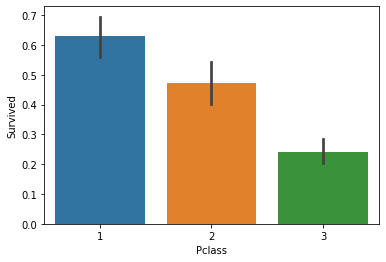

In [18]:
sns.barplot(data=train,x='Pclass',y='Survived')

In [19]:
train['Pclass_1'] = (train['Pclass']==1)
train['Pclass_2'] = (train['Pclass']==2)
train['Pclass_3'] = (train['Pclass']==3)

test['Pclass_1'] = (test['Pclass']==1)
test['Pclass_2'] = (test['Pclass']==2)
test['Pclass_3'] = (test['Pclass']==3)

In [20]:
train = train.drop(columns = 'Pclass')
test = test.drop(columns = 'Pclass')

In [21]:
train['Title'] = train['Name'].str.extract("([A-Za-z]+)\.", expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Lady          1
Don           1
Countess      1
Jonkheer      1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [22]:
test['Title'] = test['Name'].str.extract("([A-Za-z]+)\.", expand=False)

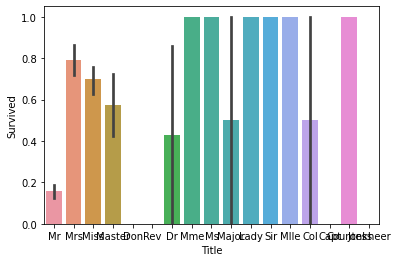

In [23]:
sns.barplot(data=train,x='Title',y='Survived')

In [24]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train['Title'] = train['Title'].replace(['Jonkheer', 'Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'Countess', 'Lady', 'Dona'], 'Royalty')
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')

test['Title'] = test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
test['Title'] = test['Title'].replace(['Jonkheer', 'Master'], 'Master')
test['Title'] = test['Title'].replace(['Don', 'Sir', 'Countess', 'Lady', 'Dona'], 'Royalty')
test['Title'] = test['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
test['Title'] = test['Title'].replace(['Mlle', 'Miss'], 'Miss')
test['Title'] = test['Title'].replace(['Mr'], 'Mr')

In [25]:
train['Title_1'] = (train['Title']=='Officer')
train['Title_2'] = (train['Title']=='Master')
train['Title_3'] = (train['Title']=='Royalty')
train['Title_4'] = (train['Title']=='Mrs')
train['Title_5'] = (train['Title']=='Miss')
train['Title_6'] = (train['Title']=='Mr')

test['Title_1'] = (test['Title']=='Officer')
test['Title_2'] = (test['Title']=='Master')
test['Title_3'] = (test['Title']=='Royalty')
test['Title_4'] = (test['Title']=='Mrs')
test['Title_5'] = (test['Title']=='Miss')
test['Title_6'] = (test['Title']=='Mr')

In [26]:
train = train.drop(columns = 'Title')
test = test.drop(columns = 'Title')

In [27]:
train = train.drop(columns = 'Name')
test = test.drop(columns = 'Name')

In [28]:
train.dtypes

Survived      int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Pclass_1       bool
Pclass_2       bool
Pclass_3       bool
Title_1        bool
Title_2        bool
Title_3        bool
Title_4        bool
Title_5        bool
Title_6        bool
dtype: object

In [29]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
train['male'] = (train['Sex']=='male')
test['male'] = (test['Sex']=='male')

In [31]:
train = train.drop(columns = 'Sex')
test = test.drop(columns = 'Sex')

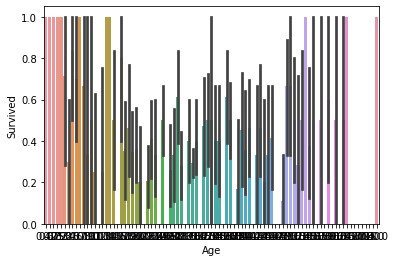

In [32]:
sns.barplot(data=train,x='Age',y='Survived')

In [33]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names)
train['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

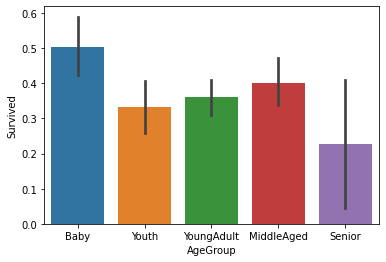

In [34]:
sns.barplot(data=train,x='AgeGroup',y='Survived')

In [35]:
test['AgeGroup'] = pd.cut(test['Age'], bins=bin, labels=group_names)
test['AgeGroup'].value_counts()

YoungAdult    171
MiddleAged     94
Youth          88
Baby           54
Senior         11
Name: AgeGroup, dtype: int64

In [36]:
train = train.drop(columns = 'Age')
test = test.drop(columns = 'Age')

In [37]:
# train['AgeGroup_1'] = (train['AgeGroup'] == 'Baby')
# train['AgeGroup_2'] = (train['AgeGroup'] == 'Senior')

# test['AgeGroup_1'] = (test['AgeGroup'] == 'Baby')
# test['AgeGroup_2'] = (test['AgeGroup'] == 'Senior')

train = train.drop(columns = 'AgeGroup')
test = test.drop(columns = 'AgeGroup')

In [38]:
train['Embarked_1'] = (train['Embarked'] == 'S')
train['Embarked_2'] = (train['Embarked'] == 'C')
train['Embarked_3'] = (train['Embarked'] == 'Q')

test['Embarked_1'] = (test['Embarked'] == 'S')
test['Embarked_2'] = (test['Embarked'] == 'C')
test['Embarked_3'] = (test['Embarked'] == 'Q')

train = train.drop(columns = 'Embarked')
test = test.drop(columns = 'Embarked')

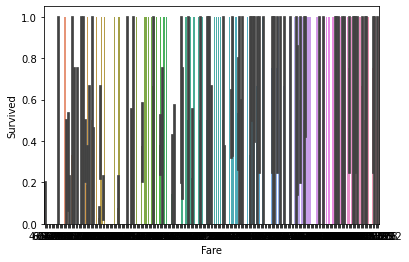

In [39]:
sns.barplot(data=train,x='Fare',y='Survived')

In [40]:
train = train.drop(columns = 'Fare')
test = test.drop(columns = 'Fare')

In [41]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

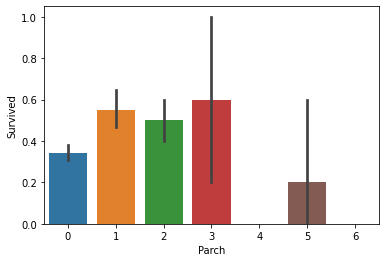

In [42]:
sns.barplot(data=train,x='Parch',y='Survived')

In [43]:
train = train.drop(columns = 'Parch')
test = test.drop(columns = 'Parch')

In [44]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

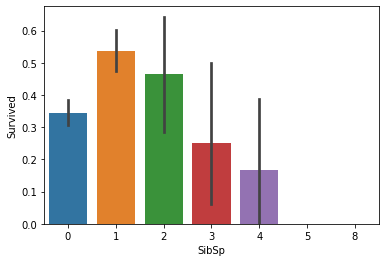

In [45]:
sns.barplot(data=train,x='SibSp',y='Survived')

In [46]:
# train['SibSp_0'] = (train['SibSp']==0)
# train['SibSp_1'] = (train['SibSp']==1)
# train['SibSp_2'] = (train['SibSp']==2)
# train['SibSp_3'] = (train['SibSp']==3)
# train['SibSp_4'] = (train['SibSp']==4)
# train['SibSp_5'] = (train['SibSp']==5)
# train['SibSp_8'] = (train['SibSp']==8)

# test['SibSp_0'] = (test['SibSp']==0)
# test['SibSp_1'] = (test['SibSp']==1)
# test['SibSp_2'] = (test['SibSp']==2)
# test['SibSp_3'] = (test['SibSp']==3)
# test['SibSp_4'] = (test['SibSp']==4)
# test['SibSp_5'] = (test['SibSp']==5)
# test['SibSp_8'] = (test['SibSp']==8)

train = train.drop(columns = 'SibSp')
test = test.drop(columns = 'SibSp')

In [47]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [48]:
train = train.drop(columns = 'Ticket')
test = test.drop(columns = 'Ticket')

In [49]:
train.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,male,Embarked_1,Embarked_2,Embarked_3
0,0,False,False,True,False,False,False,False,False,True,True,True,False,False
1,1,True,False,False,False,False,False,True,False,False,False,False,True,False
2,1,False,False,True,False,False,False,False,True,False,False,True,False,False
3,1,True,False,False,False,False,False,True,False,False,False,True,False,False
4,0,False,False,True,False,False,False,False,False,True,True,True,False,False


In [50]:
Y_train=train['Survived']
X_train=train[list(test)]
X_test=test[list(test)]

print(X_train.shape, Y_train.shape, X_test.shape)

(891, 13) (891,) (418, 13)


In [51]:
test.isnull().sum()

Pclass_1      0
Pclass_2      0
Pclass_3      0
Title_1       0
Title_2       0
Title_3       0
Title_4       0
Title_5       0
Title_6       0
male          0
Embarked_1    0
Embarked_2    0
Embarked_3    0
dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, random_state=1)
model.fit(X_train, Y_train)
submission['Survived'] = model.predict(X_test)
submission.to_csv('./titanic_submission.csv', index = False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
